# Modelling a QHO wave function to find Energy values using the Hamiltonian operator

## 18003453 - Harvey Bermingham

This notebook will explore how to model the wave function of a quantum harmonic oscillator in a grid of x and y coordinates, this model will be used along with the Hamiltonian operator for finding the energy of wave fucntions to find the separate kinetic and potential energies of this wave function.

The differentials required will be found by creating a function to differentiate the original model, then the operators will be applied to the functions in the ways show below and finally this will be integrated across all space to find the scalar potential and kinetic energy values for the model.

The wave function will have a form as shown below. This function and all other equations and values in this notebook will be in terms of atomic units.

Equation 1:
$$
\psi{(x)}=\left( \frac{2α}{π}\right)^{\frac{1}{4}} e^{-αx^2}
$$

Then the energy of this wavefunction will be found by applying the Hamiltonian operator, as such:

Equation 2:
$$
E_ψ=\frac{∫dx ψ^⋆ (x)\hat{H} ψ(x)}{∫dx ψ^⋆ (x)ψ(x)}
$$

The denominator here will be equal to zero where the wave function is normalised. The Hamiltonian operator in turn may be given by the equation:

Equation 3:
$$
\hat{H}=\hat{T}+\hat{V}=-\frac{1}{2}  \frac{d^2}{dx^2}+\frac{1}{2} kx^2
$$

Where $\hat{T}$ is the kinetic energy operator and $\hat{V}$ is the potential energy operator. The energies found at the end will be separated by these two operators. Also, the k from this equation will be set = 1 throughout this notebook as this constant is a fairly trivial value in this context.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

### Section on wavefunction and derivatives

In this section the grid emulating values for the wavefunction will be created, it will use the Eq. 1, where $\alpha$ = 1 for the array of x values that have been chosen.

The value of dx has been set to be 1e-7 as from previous testing below this value the error of the integration became too intensive for my computer to process, so this is a good trade between computation and accuracy.

In [18]:
#setting array
dx=1e-5
x = np.arange(-5,5,dx)

#wave function
alpha = 1
psi = ((2*alpha)/np.pi)**0.25 * np.exp(-x**2)

In [19]:
def d2f(fun_arr,dx):
    """Finds second derivative of an array of function values using-
    the second order centred difference formula.
     Inputs:
    fun_arr: array of function values
    dx: finite difference between points
    
    Returns:
    d2f_dx2: second order derivative"""
    
    #shifting array
    f_pshift = np.roll(fun_arr, -1)
    f_nshift = np.roll(fun_arr, +1)
    
    numerator = f_pshift - 2*fun_arr + f_nshift
    
    return numerator/(dx**2)

In [20]:
#d2psi array
d2psi = d2f(psi,dx)

#plotting d2psi and psi
plt.plot(x,psi, label=r'$\psi(x)$')
plt.plot(x,d2psi, label=r'$\frac{d^2\psi(x)}{dx^2}$')
plt.xlabel('x')
plt.ylabel(r'$\frac{d^2\psi(x)}{dx^2}$ and $\psi(x)$')
plt.title("Figure 1: Plotting $\psi(x)$ and it's second derivative")
plt.legend()
plt.grid(linestyle=':')

<IPython.core.display.Javascript object>

### Section on evaluating the energy

In this section Eq. 2 will be used to evaulate the associated energy values with the energy operators. The first step in this is for the $\hat{T}$ and $\hat{V}$ operators given in Eq. 3 to be applied to to the wavefunctions as in Eq.'s 4 & 5 shown below.

Equation 4:
$$
ψ^⋆ (x)\hat{T} ψ(x) = -\frac{1}{2}ψ(x)\frac{d^2ψ(x)}{dx^2}
$$

Equation 5:
$$
ψ^⋆ (x)\hat{V} ψ(x) = \frac{k}{2}ψ(x)x^2ψ(x)
$$

For the $\hat{T}$ equation, as the operator includes a double differential with respect to x, the d2psi array that has already been operated on will be used. Also, as the $\psi(x)$ has not imaginary parts as shown in Eq. 1, therefore $\psi^⋆(x)$ = $\psi(x)$, this may be seen in Eq. 4 & 5 above.

The final step to evaluate the energy values associated with the operators is to integrate the arrays created from Eq's 4 & 5. Normally this integration covers all space however for finite modelling we integrate over the whole array. This is represented in the equations below:

Equation 6:
$$
E_{KE}=-\frac{1}{2}∫dx ψ(x)\frac{d^2ψ(x)}{dx^2}
$$

Where $E_{KE}$ is the kinetic energy value of the QHO as a function of x

Equation 7:
$$
E_{PE}=\frac{1}{2}k∫dx ψ(x)x^2ψ(x)
$$

Where $E_{PE}$ is the potential energy value of the QHO as a function of x.

<IPython.core.display.Javascript object>


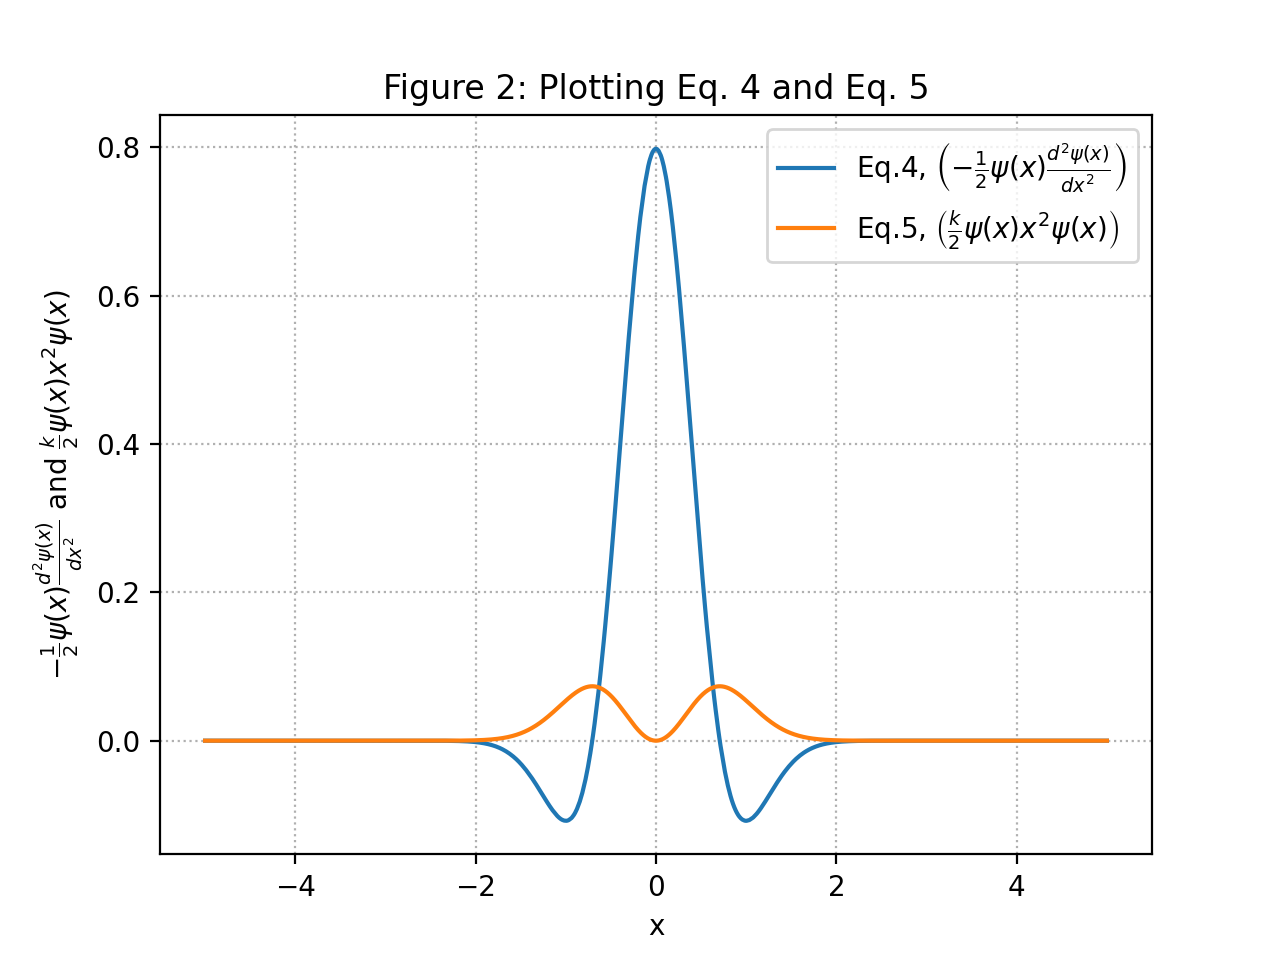

Text(0.5, 1.0, 'Figure 2: Plotting Eq. 4 and Eq. 5')

In [21]:
#arrays for Eq's 4 & 5
k = 1
E_KEdx = -0.5*psi*d2psi
E_PEdx = 0.5*k*psi*(x**2)*psi

#plotting E_KEdx and E_PEdx
plt.plot(x,E_KEdx,label=r'Eq.4, $\left(-\frac{1}{2}ψ(x)\frac{d^2ψ(x)}{dx^2}\right)$')
plt.plot(x,E_PEdx,label=r"Eq.5, $\left(\frac{k}{2}ψ(x)x^2ψ(x)\right)$")
plt.grid(linestyle=':')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel(r'$-\frac{1}{2}ψ(x)\frac{d^2ψ(x)}{dx^2}$ and $\frac{k}{2}ψ(x)x^2ψ(x)$')
plt.title('Figure 2: Plotting Eq. 4 and Eq. 5')

In [22]:
from scipy import integrate

#integrating over x
E_KE = integrate.simps(E_KEdx,x)
E_PE = integrate.simps(E_PEdx,x)

#outputting values
print(r'The kinetic energy of the wave function is',E_KE)
print(r'The potential energy of the wave function is',E_PE)

The kinetic energy of the wave function is 0.4999999999510512
The potential energy of the wave function is 0.12499999999999999


### Conclusions

The values of Kinetic and Potential energy outputted from the integral line up well with the functions that can be seen in the graph in Fig 2. The function of Eq. 4 associated with kinetic energy has a maximum value of 0.8 and is quite broad whereas the function of Eq. 5 has much smaller peaks of around 0.07 with a similar width. These lines fit well with the evaulation of a larger KE of 0.5 and a smaller PE of 0.125. 

Even in Fig. 1 the double differential of the wave function has a peak much farther away from 0 on the y-axis than the wave function itself. This follows through as the double differential lies within the equation for the KE.